In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
df=pd.read_csv('/content/iris-write-from-docker.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
cols = ['class']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['class']), df['class'], test_size = 0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((105, 4), (105,), (45, 4), (45,))

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [7]:
min_max_scaler=preprocessing.MinMaxScaler()

In [8]:
cols_norm=['sepal_length','sepal_width','petal_length','petal_width']

In [9]:
df[cols_norm]=min_max_scaler.fit_transform(df[cols_norm])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [10]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []
specificity = []

In [11]:
algo = "K Nearest Neighbour"
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy for K Nearest Neighbour is :', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall K Nearest Neighbour is :', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision is K Nearest Neighbour :', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score is K Nearest Neighbour :', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

K Nearest Neighbour
[[18  0  0]
 [ 0 14  1]
 [ 0  1 11]] 


Accuracy for K Nearest Neighbour is : 95.55555555555556
Recall K Nearest Neighbour is : 95.55555555555556
Precision is K Nearest Neighbour : 95.55555555555556
F1 score is K Nearest Neighbour : 95.55555555555556
Specificity: 1.0


In [12]:
algo = "Naive Bayes"
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Naive Bayes is :', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall Naive Bayes is :', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision Naive Bayes is :', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score Naive Bayes is :', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Naive Bayes
[[18  0  0]
 [ 0 13  2]
 [ 0  1 11]] 


Accuracy Naive Bayes is : 93.33333333333333
Recall Naive Bayes is : 93.33333333333333
Precision Naive Bayes is : 93.33333333333333
F1 score Naive Bayes is : 93.33333333333333
Specificity: 1.0


In [13]:
algo = "Ada Boost"
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score:', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Ada Boost
[[18  0  0]
 [ 0 13  2]
 [ 0  2 10]] 


Accuracy: 91.11111111111111
Recall: 91.11111111111111
Precision: 91.11111111111111
F1 score: 91.11111111111111
Specificity: 1.0


In [14]:
from sklearn import svm
algo = "SVM"
model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred,) * 100
print('Accuracy:', acc)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision:', pre)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall Naive Bayes is :', rec)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score:', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)

precision.append(pre)
f1Score.append(f1s)

SVM
[[18  0  0]
 [ 0 13  2]
 [ 0  0 12]] 


Accuracy: 95.55555555555556
Precision: 95.55555555555556
Recall Naive Bayes is : 95.55555555555556
F1 score: 95.55555555555556
Specificity: 1.0


<BarContainer object of 4 artists>

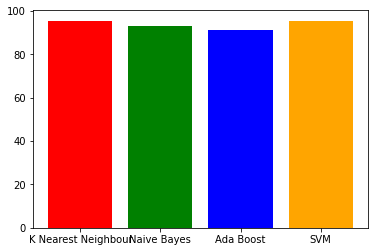

In [15]:
plt.bar(algos, accuracy,width = 0.8, color = ['red', 'green','blue' ,'orange' ])

In [16]:
num = int(input("Enter a number: "))    
factorial = 1    
if num < 0:    
   print(" Factorial does not exist for negative numbers")    
elif num == 0:    
   print("The factorial of 0 is 1")    
else:    
   for i in range(1,num + 1):    
       factorial = factorial*i    
   print("The factorial of",num,"is",factorial)

Enter a number: 34
The factorial of 34 is 295232799039604140847618609643520000000
